In [1]:
# run in tardi_gait folder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from gait_analysis import *
from scipy.stats import sem
import os

main_dir = os.getcwd()

In [3]:
# get list of directories in analyzed_movies
exp_dir = 'comps'
os.chdir(os.path.join(main_dir, exp_dir))

dir_list = listDirectories()
for d in dir_list:
    print(d)

group1
group2


In [4]:
# choose which folders to compare
dir1 = 'group1'
dir2 = 'group2'

fname = 'all_step_data_swings.csv' # created by the script save_step_data.py

In [5]:
os.chdir(os.path.join(main_dir,exp_dir))
df1 = experimentToDf(dir1,fname)
print('DF size',df1.shape)
df1[df1.ref_leg=='R3'].head(3) 


Choose from this list (separate by commas if multiple choices): 
1: 3b035-043
2: 3a034-047
3: 3b089-101
4: 3a007-023
5: 3b048-069
6: 3b120-133
7: select ALL

Which number(s) do you want? 7

You chose them all

could not find 3b035-043/all_step_data_swings.csv


NameError: name 'exit' is not defined

In [9]:
df2 = experimentToDf(dir2,fname)
print('DF size',df2.shape)
df2[df2.ref_leg=='R3'].head(3) 


Choose from this list (separate by commas if multiple choices): 
1: 1b002-013
2: 1a014-031
3: 1a003-009
4: select ALL

Which number(s) do you want? 4

You chose them all

Found 1b002-013/all_step_data_swings.csv
Found 1a014-031/all_step_data_swings.csv
Found 1a003-009/all_step_data_swings.csv
DF size (307, 17)


,ref_leg,down_time,up_time,stance_time,swing_time,gait_cycle,duty_factor,mid_swing,R4_mid_swings,R3_mid_swings,R2_mid_swings,R1_mid_swings,L1_mid_swings,L2_mid_swings,L3_mid_swings,L4_mid_swings,clip
15,R3,0.668,1.236,0.568,0.234,0.802,0.7082,1.3530,R4:0.4165,R3:0.8541,R2:,R1:0.4595,L1:0.8541,L2:0.4389,L3:0.1054,L4:0.7082,1b002-013
16,R3,1.470,2.070,0.600,0.233,0.833,0.7203,2.1865,R4:0.4196,R3:0.8601,R2:0.12,R1:0.5,L1:0.7197,L2:0.3998,L3:0.1194;0.94,L4:0.62,1b002-013
17,R3,2.303,2.838,0.535,0.233,0.768,0.6966,2.9545,R4:0.5007,R3:0.8483,R2:0.1302,R1:0.5,L1:0.7181,L2:0.304,L3:,L4:0.6087,1b002-013


In [10]:
# which legs should we compare?
leg_combos = get_leg_combos()
for combo in leg_combos:
    print(combo,leg_combos[combo])
    
legs_to_comp = leg_combos['legs_lateral']
print('\ncomparing ',legs_to_comp)

legs_all ['L4', 'L3', 'L2', 'L1', 'R1', 'R2', 'R3', 'R4']
legs_lateral ['L3', 'L2', 'L1', 'R1', 'R2', 'R3']
legs_all_right ['R4', 'R3', 'R2', 'R1']
legs_all_left ['L4', 'L3', 'L2', 'L1']
legs_right ['R3', 'R2', 'R1']
legs_left ['L3', 'L2', 'L1']
legs_1 ['R1', 'L1']
legs_2 ['R2', 'L2']
legs_3 ['R3', 'L3']
legs_4 ['R4', 'L4']

comparing  ['L3', 'L2', 'L1', 'R1', 'R2', 'R3']


In [11]:
def custom_boxplot(bp):
    for box in bp['boxes']:
        box.set(color ='k', linewidth = 2, linestyle ="-")

    for whisker in bp['whiskers']:
        whisker.set(color ='k', linewidth = 2, linestyle ="-")

    for cap in bp['caps']:
        cap.set(color ='k', linewidth = 2)

    # changing color and linewidth of medians
    for median in bp['medians']:
        median.set(color ='k', linewidth = 2)

    # changing style of fliers
    for flier in bp['fliers']:
        flier.set(marker ='.', color ='#e7298a', alpha = 0.5)
        
    return bp

In [12]:
metachronal_lag, normalized_metachronal_lag = get_metachronal_lag(df1)
print(metachronal_lag)
print(normalized_metachronal_lag)

[0.433, 0.534, 0.501, 0.534, 0.5, 0.567, 0.533, 0.467, 0.567, 0.5, 0.5, 0.534, 0.501, 0.434, 0.6, 0.433, 0.567, 0.467, 0.601, 0.5, 0.6, 0.467, 0.467, 0.901, 0.867, 0.834, 1.134, 1.034, 0.934, 0.801, 0.9, 1.001, 0.6, 0.6, 0.6, 0.5, 0.567, 0.634, 0.6, 0.567, 0.633, 0.601, 0.734, 0.567, 0.434, 0.5, 0.467, 0.467, 0.5, 0.6, 0.701, 0.601, 0.5, 0.667, 0.5, 0.533, 0.467, 0.533, 0.501, 0.533, 0.467, 0.5, 0.5, 0.434, 0.533, 0.567, 0.567, 0.467, 0.534, 0.567, 0.467, 0.534, 0.467, 0.467, 0.501, 0.501, 0.567, 0.567, 0.467, 0.533]
[0.648, 0.763, 0.683, 0.763, 0.681, 0.85, 0.665, 0.636, 0.739, 0.624, 0.714, 0.728, 0.683, 0.651, 0.719, 0.619, 0.772, 0.609, 0.819, 0.652, 0.817, 0.609, 0.583, 1.175, 1.04, 1.087, 1.545, 1.411, 1.076, 1.144, 1.226, 1.43, 0.782, 0.782, 0.719, 0.713, 0.809, 0.761, 0.817, 0.739, 0.949, 0.75, 0.918, 0.629, 0.566, 0.652, 0.7, 0.636, 0.75, 0.856, 0.914, 0.751, 0.713, 0.953, 0.577, 0.694, 0.667, 0.726, 0.683, 0.726, 0.738, 0.6, 0.75, 0.651, 0.76, 0.81, 0.772, 0.667, 0.696, 0.849

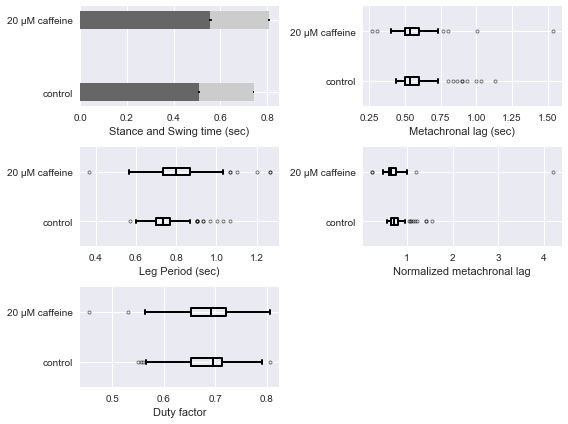

In [14]:
# in each experiment . . . (df1 and df2)
# get step parameters for each experiment
# for the legs in legs_to_comp

# error bars for stance and swing duration:
# choose from std or sem (could also use 95%CI but need to code that)
# sem is really small, b/c sample size (every step) is so big

plt.style.use('seaborn')

stance_color = [0.4,0.4,0.4]
swing_color = [0.8,0.8,0.8]

comps = [dir1,dir2]

# comp_labs = comps
comp_labs = ['control','20 µM caffeine']

stances_1 = df1[df1['ref_leg'].isin(legs_to_comp)]['stance_time'].values
stances_2 = df2[df2['ref_leg'].isin(legs_to_comp)]['stance_time'].values
stances = [np.mean(stances_1),np.mean(stances_2)]
# stance_err = [np.std(stances_1),np.std(stances_2)]
stance_err = [sem(stances_1),sem(stances_2)]

swings_1 = df1[df1['ref_leg'].isin(legs_to_comp)]['swing_time'].values
swings_2 = df2[df2['ref_leg'].isin(legs_to_comp)]['swing_time'].values
swings = [np.mean(swings_1),np.mean(swings_2)]
# swing_err = [np.std(swings_1),np.std(swings_2)]
swing_err = [sem(swings_1),sem(swings_2)]

gait_cycles_1 = df1[df1['ref_leg'].isin(legs_to_comp)]['gait_cycle'].values
gait_cycles_2 = df2[df2['ref_leg'].isin(legs_to_comp)]['gait_cycle'].values
gait_cycles = [gait_cycles_1,gait_cycles_2]

duty_factors_1 = df1[df1['ref_leg'].isin(legs_to_comp)]['duty_factor'].values
duty_factors_2 = df2[df2['ref_leg'].isin(legs_to_comp)]['duty_factor'].values
duty_factors = [duty_factors_1,duty_factors_2]

ml1, nml1 = get_metachronal_lag(df1)
ml2, nml2 = get_metachronal_lag(df2)
ml = [ml1,ml2]
nml = [nml1,nml2]

fig = plt.figure(figsize=(8,6))

# Stance and Swing duration
ax1 = fig.add_subplot(321)
ax1.barh(comps, stances, align='center', height=.25, xerr = stance_err,
         color=stance_color, label='stances')
ax1.barh(comps, swings, align='center', height=.25, left=stances, xerr = swing_err,
         color=swing_color ,label='swings')
ax1.set_xlabel('Stance and Swing time (sec)')
ax1.set_yticks(np.array(range(len(comps))))
ax1.set_yticklabels(comp_labs, fontsize=10)

# Gait_cycle (aka leg period)
ax3 = fig.add_subplot(323)
bp3 = ax3.boxplot(gait_cycles, vert = False)
bp3 = custom_boxplot(bp3)
ax3.set_yticks(np.array(range(len(comps)))+1)
ax3.set_yticklabels(comp_labs, fontsize=10)
ax3.set_xlabel('Leg Period (sec)')

# Duty Factor
ax5 = fig.add_subplot(325)
bp5 = ax5.boxplot(duty_factors, vert = False)
bp5 = custom_boxplot(bp5)
ax5.set_yticks(np.array(range(len(comps)))+1)
ax5.set_yticklabels(comp_labs, fontsize=10)
ax5.set_xlabel('Duty factor')

# Metachronal lag
ax2 = fig.add_subplot(322)
bp2 = ax2.boxplot(ml, vert = False)
bp2 = custom_boxplot(bp2)
ax2.set_yticks(np.array(range(len(comps)))+1)
ax2.set_yticklabels(comp_labs, fontsize=10)
ax2.set_xlabel('Metachronal lag (sec)')

# Normalized metachronal lag
ax4 = fig.add_subplot(324)
bp4 = ax4.boxplot(nml, vert = False)
bp4 = custom_boxplot(bp4)
ax4.set_yticks(np.array(range(len(comps)))+1)
ax4.set_yticklabels(comp_labs, fontsize=10)
ax4.set_xlabel('Normalized metachronal lag')

plt.tight_layout()
plt.show()